
# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The datasets are from this github respository https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md.

- The NICS data contains the number of firearm checks by month, state, and type. (filename: gun_data.csv)
- The U.S. census data contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year. (filename: us_census.csv)

That gun data comes from [FBI's Nation Instant Criminal Background Check System (NICS)](https://www.fbi.gov/services/cjis/nics).

## Exploration Questions

These are the questions that I'd like to explore.

- **Q1:** What census data is most associated with high gun per capita?
- **Q2:** Which states have had the highest growth in gun registrations?
- **Q3:** What is the overall trend of gun purchases?


> **Tip**: at least one dependent variable and three independent variables.

In [9]:
# Data / package import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#from datetime import datetime # operations to parse dates
#import pprint # use to print data structures like dictionaries in a nicer way than the base print function.

In [ ]:
# “40 percent” statistic, or the percentage of people who obtain a firearm without going through a background check.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [45]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_guns = pd.read_csv('./data/guns-data.csv')

df_guns_edited = df_guns[['state','month','totals']].groupby(['state'],['month']).mean()
print(df_guns_edited)

TypeError: unhashable type: 'list'

In [36]:
sns.lmplot('x', 'y', data=df_guns_edited, fit_reg=False)

KeyError: "['x' 'y'] not in index"

(array([  991.,  1055.,   874.,   881.,   931.,  1137.,  1170.,  1366.,
         1709.,  2646.]),
 array([     0. ,   1043.5,   2087. ,   3130.5,   4174. ,   5217.5,
          6261. ,   7304.5,   8348. ,   9391.5,  10435. ]),
 <a list of 10 Patch objects>)

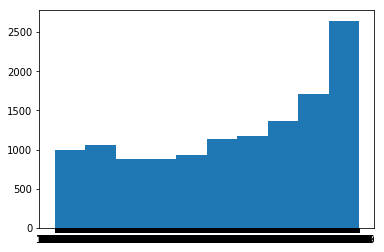

In [37]:
plt.hist(df_guns_edited)

In [7]:
df_guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12736.000000,1375.000000,12740.000000,12741.000000,5775.000000,12760.000000,12737.000000,10817.000000,10815.000000,5390.000000,...,2090.000000,1265.000000,1100.000000,3025.000000,3025.000000,3025.000000,2750.000000,3025.000000,2530.000000,12760.000000
mean,6610.938128,1326.202182,6059.709262,7845.176281,378.960866,271.361834,58.141949,4.871499,7.787887,0.188868,...,1.085167,0.107510,0.107273,17.233058,13.771570,1.231736,0.432727,0.481983,0.108696,22012.392085
std,24700.643313,10282.508342,8796.577531,9311.128953,1337.569194,779.820198,599.162551,10.927737,16.320863,1.082060,...,4.454055,0.835988,0.747055,78.628717,60.243891,4.908641,1.481185,1.582317,0.425143,33629.425268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,888.000000,2092.000000,18.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4686.750000
50%,553.000000,0.000000,3114.000000,5147.000000,129.000000,126.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12519.500000
75%,4421.250000,1.000000,7421.500000,10435.000000,370.500000,303.250000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,25846.500000
max,522188.000000,124056.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 27 columns):
month                        12760 non-null object
state                        12760 non-null object
permit                       12736 non-null float64
permit_recheck               1375 non-null float64
handgun                      12740 non-null float64
long_gun                     12741 non-null float64
other                        5775 non-null float64
multiple                     12760 non-null int64
admin                        12737 non-null float64
prepawn_handgun              10817 non-null float64
prepawn_long_gun             10815 non-null float64
prepawn_other                5390 non-null float64
redemption_handgun           10820 non-null float64
redemption_long_gun          10819 non-null float64
redemption_other             5390 non-null float64
returned_handgun             2475 non-null float64
returned_long_gun            2420 non-null float64
returned_other   

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!